In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier()
import xgboost as xgb
XGB = xgb.XGBClassifier()
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'C:\Users\Seba\Documents\python\datasets pyth\heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


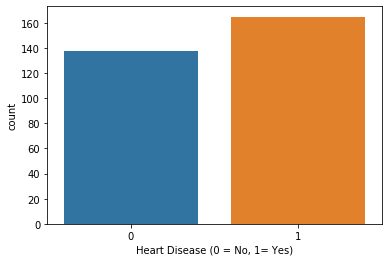

In [30]:
sns.countplot(x='target',data=df)
plt.xlabel("Heart Disease (0 = No, 1= Yes)")
plt.show()

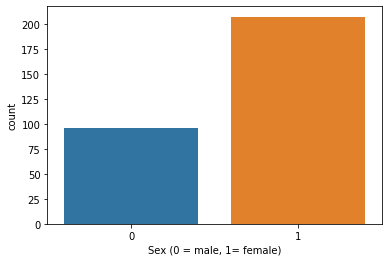

In [26]:
sns.countplot(x='sex',data=df)
plt.xlabel("Sex (0 = male, 1= female)")
plt.show()

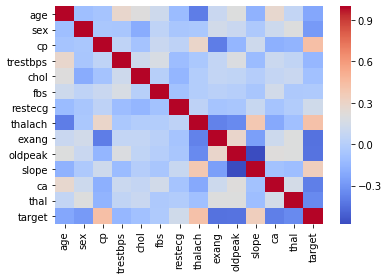

In [67]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [4]:
X=df.drop('target',axis=1)
y=df['target']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)


In [69]:
#predictions
LR.fit(X_train,y_train)
LR_pred = LR.predict(X_test)
acc1 = accuracy_score(y_test, LR_pred)
print("Logistic Regression Accuracy= ", np.round(acc1,3))
#dtree
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
acc3 = accuracy_score(y_test, dtree_pred)
print("Dtree Accuracy= ", np.round(acc3,3))
#randomforest
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
acc4= accuracy_score(y_test, rfc_pred)
print("RFC Accuracy= ", np.round(acc4,3))
#Xgboost
XGB.fit(X_train,y_train)
XGB_pred = XGB.predict(X_test)
acc5 = accuracy_score(y_test, XGB_pred)
print("XGB Sample Accuracy= ", np.round(acc5,3))


Logistic Regression Accuracy=  0.802
Dtree Accuracy=  0.725
RFC Accuracy=  0.824
XGB Sample Accuracy=  0.802


In [5]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
frames = [df,a,b,c]
df = pd.concat(frames,axis=1)
df.drop(['cp','thal','slope'],axis=1,inplace= True)


In [95]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [7]:
#predictions
LR.fit(X_train,y_train)
LR_pred = LR.predict(X_test)
acc1 = accuracy_score(y_test, LR_pred)
print("Logistic Regression Accuracy= ", np.round(acc1,3))
#dtree
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
acc3 = accuracy_score(y_test, dtree_pred)
print("Dtree Accuracy= ", np.round(acc3,3))
#randomforest
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
acc4= accuracy_score(y_test, rfc_pred)
print("RFC Accuracy= ", np.round(acc4,3))
#Xgboost
XGB.fit(X_train,y_train)
XGB_pred = XGB.predict(X_test)
acc5 = accuracy_score(y_test, XGB_pred)
print("XGB Sample Accuracy= ", np.round(acc5,3))

Logistic Regression Accuracy=  0.802
Dtree Accuracy=  0.758
RFC Accuracy=  0.835
XGB Sample Accuracy=  0.802
